In [ ]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 53 µs, sys: 0 ns, total: 53 µs
Wall time: 57.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a, b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    if(len(a[0]) == len(b)):
       
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out

    else:
      print("Las condiciones de las matrices no son aptas para multiplicarse.")


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a, b)

Las condiciones de las matrices no son aptas para multiplicarse.


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9],
     [1, 2, 1]]

b = [[9, 8, 7, 6],
     [5, 4, 3, 2],
     [1, 4, 5, 4]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
matmul(a,b)

[[22, 28, 28, 22], [67, 76, 73, 58], [112, 124, 118, 94], [20, 20, 18, 14]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

1.4541468601263103

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7328206333029678, 0.6110442959671221, 0.6731487291567719],
 [0.5375935000261907, 0.5646236835063869, 0.7485533865000166]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
import time
t = 0
for i in range(0, 10):
  s = time.time()  
  x = matmul(randa, randb)
  p = time.time()-s
  t = t + p
t = t / 10
t

11.577554893493652

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd
time_df = pd.DataFrame([t],index=['Python'],columns=['Average'])
time_df

,Average
Python,11.577555


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time
import numpy as np
tr=0
for i in range(0,10):
  randa = np.array(random_matrix(600, 100))
  randb = np.array(random_matrix(100, 600))
  s = time.time()  
  x = np.matmul(randa, randb)
  p = time.time()-s
  tr = tr + p
tr = tr/10
time_df = pd.DataFrame([t,tr],index=['Python','NumPy'],columns=['Average'])
time_df

,Average
Python,11.577555
NumPy,0.004182


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.4 s, sys: 38.9 ms, total: 11.5 s
Wall time: 11.6 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 13 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 209 µs, sys: 3 µs, total: 212 µs
Wall time: 221 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = [[1, 2],
     [2, 4]]

B = [[4, 5],
     [5, 6]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine fortran_matmul(A,B,R)
    implicit none
    double precision, intent(in) :: A(2,*)
    double precision, intent(in) :: B(2,*)
    double precision, intent(out) :: R(2,2)
    integer I,J,K,aux
    do I=1,2
      do J=1,2
        R(I,J)=0
        do K=1,2
          R(I,J) = R(I,J) + A(I,K) * B(K,J)
        end do
      end do
    end do
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
fortran_matmul(A, B)

array([[14., 17.],
       [28., 34.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine fortran_matmulti(A,B,N,L,M,R)
    implicit none
    integer, intent(in) :: N,L,M
    double precision, intent(in) :: A(600,*)
    double precision, intent(in) :: B(100,*)
    double precision, intent(out) :: R(N,M)
    integer I,J,K,aux
    do I=1,N
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J) = R(I,J) + A(I,K) * B(K,J)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
import numpy as np
A1 = np.array(random_matrix(600,100))
A2 = np.array(random_matrix(100,600))

N=len(A1)
L=len(A1[0])
M=len(A2[0])

fortran_matmulti(A1,A2,N,L,M)

array([[28.68401567, 28.9869509 , 25.05983936, ..., 25.71686191,
        25.75520022, 27.76145657],
       [22.18782861, 24.49664833, 21.88638446, ..., 21.14382732,
        21.62119256, 23.25675884],
       [23.4748635 , 25.36743675, 23.26087394, ..., 22.31011086,
        21.7388728 , 23.09958826],
       ...,
       [25.68456161, 26.7775236 , 23.33328162, ..., 23.47782503,
        22.97176682, 25.27234246],
       [22.9328339 , 24.21511942, 20.38255478, ..., 21.72993918,
        23.50518341, 22.11723681],
       [23.83593358, 26.05928704, 23.72402324, ..., 24.15086792,
        22.94803226, 24.8612416 ]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
%%time
for i in range(0,10):
  fortran_matmulti(A1,A2,N,L,M)

CPU times: user 417 ms, sys: 1.99 ms, total: 419 ms
Wall time: 421 ms


In [ ]:
mf = 0
for i in range(10):
  start_time = time.time()
  fortran_matmulti(A1,A2,N,L,M)
  v = time.time() - start_time
  mf = mf + v

mf = mf/10
time_df = pd.DataFrame([t,tr,mf],index=['Python','NumPy','Fortran Magic'],columns=['Average'])
time_df

,Average
Python,11.577555
NumPy,0.004182
Fortran Magic,0.117916


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran

subroutine matmul20(A,B,N,L,M,R)
  implicit none
  integer,intent(in) :: N,L,M
  double precision, intent(in) :: A(600,*)
  double precision, intent(in) :: B(100,*)
  double precision, intent(out) :: R(N,M)
  integer I,X,J,K,aux
  do X=0, 10
    do I=1,N
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J) = R(I,J) + A(I,K)*B(K,J)

        end do
      end do
    end do
  end do
end

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
A1 = np.array(random_matrix(600,100))
A2 = np.array(random_matrix(100,600))

N=len(A1)
L=len(A1[0])
M=len(A2[0])

matmul20(A1,A2,N,L,M)
md = 0
for i in range(10):
  start_time = time.time()
  matmul20(A1,A2,N,L,M)
  v = time.time() - start_time
  md = md+v

md = md/10

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
time_df = pd.DataFrame([t,tr,mf,md],index=['Python','NumPy','Fortran Magic','Fortran'],columns=['Average'])
time_df

,Average
Python,11.577555
NumPy,0.004182
Fortran Magic,0.117916
Fortran,0.486949


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_matrix.c
#include "iostream"
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
#include <ctime> 

using namespace std;
int main()
{

 srand(time(0));

 int matrixA[600][100], i ,j;
 
 for (i = 0; i < 600; ++i){
   for (j = 0;  j < 100; ++j){
    matrixA[i][j] = rand()%200;
   }
     
  }
 
int matrixB[100][600];
 for (i = 0; i < 100; i++){
      for (j = 0;  j < 600; j++){
        matrixB[i][j] = rand()%200;
        }
  }

float mc,t0,t1;
int t, mult[600][600];
for (t = 0; t<10; t++){
 t0=clock();

 for (int i = 0; i <600 ; i++)
 {
   for (int j = 0; j < 600; j++){
       
     for (int k = 0; k < 100; k++){
         
      mult[i][j] +=  matrixA[i][k] * matrixB[k][j];
      
     }
       
   }

 }
    t1 = clock();
    double time = (double(t1-t0)/CLOCKS_PER_SEC); 
    
    mc = mc+time;
}
mc = mc/10;
cout << mc;

   return 0; 
  }



Writing mult_matrix.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ mult_matrix.c && ./a.out

0.159867

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
time_df = pd.DataFrame([t,tr,mf,md,0.164],index=['Python','NumPy','Fortran Magic','Fortran','C'],columns=['Average'])
time_df

,Average
Python,11.577555
NumPy,0.004182
Fortran Magic,0.117916
Fortran,0.486949
C,0.164000


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_matrix.cpp
#include "iostream"
#include<stdio.h>
#include<stdlib.h>
#include<time.h>
#include <ctime> 

using namespace std;
int main()
{

 srand(time(0));

 int matrixA[600][100], i ,j;
 
 for ( i = 0; i < 600; ++i){
   for ( j = 0;  j < 100; ++j){
    matrixA[i][j] = rand()%200;
   }
     
  }
 

int matrixB[100][600];
 for ( i = 0; i < 100; i++){
      for( j = 0;  j < 600; j++){
        matrixB[i][j] = rand()%200;
        }
  }

float mc,t0,t1;
int t, mult[600][600];
for (t = 0; t<10; t++){
 t0=clock();

 for (int i = 0; i <600 ; i++)
 {
   for (int j = 0; j < 600; j++){
       
     for (int k = 0; k < 100; k++){
         
      mult[i][j] +=  matrixA[i][k] * matrixB[k][j];
      
     }
       
   }

 }
    t1 = clock();
    double time = (double(t1-t0)/CLOCKS_PER_SEC); 
    
    mc=mc+time;
}
mc=mc/10;
cout << mc;


   return 0; 
  }

Writing mult_matrix.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ mult_matrix.cpp && ./a.out

0.161588

**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
time_df = pd.DataFrame([t,tr,mf,md,0.164,0.253],index=['Python','NumPy','Fortran Magic','Fortran','C','C++'],columns=['Average'])
time_df

,Average
Python,11.577555
NumPy,0.004182
Fortran Magic,0.117916
Fortran,0.486949
C,0.164000
C++,0.253000


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
import java.util.concurrent.*;
class Main{
  public static void main(String[] args){
    long media = 0;
    double respuesta = 0;
    int contador = 0;
    //matrices
    int a [][]= new int[600][100];
    int b [][] =new int[100][600];
    for(int x=0; x<a.length;x++){
      for(int y=0;y<a[x].length;y++){
        a[x][y] = (int) (Math.random()*999+1);
          }
        }
    for(int x=0; x<b.length;x++){
      for(int y=0;y<b[x].length;y++){
        b[x][y] = (int) (Math.random()*999+1);
          }
        } 
    int[][] c = new int[a.length][b[0].length];
    for(contador=0;contador<10;contador++){
      long tiempo1 =System.currentTimeMillis();
      for(int i=0;i<c.length;i++){
          for(int j=0;j<c[0].length;j++){
            for(int k=0;k<b.length;k++){
              c[i][j]+=a[i][k]*b[k][j]; 
            }
          }
        }
      long tiempo2=System.currentTimeMillis();
      long tiempofinal = tiempo2 - tiempo1;
      media += tiempofinal;      
      
    } 
    respuesta= (media/10);
    respuesta= respuesta*(0.001);
    System.out.println(respuesta); 
  }
}

Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac Main.java

!java Main

0.053


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
time_df = pd.DataFrame([t,tr,mf,md,0.164,0.253,0.053],index=['Python','NumPy','Fortran Magic','Fortran','C','C++','Java'],columns=['Average'])
time_df

,Average
Python,11.577555
NumPy,0.004182
Fortran Magic,0.117916
Fortran,0.486949
C,0.164000
C++,0.253000
Java,0.053000


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmp.js

var MatrizA = []

for (var i = 0; i < 600; i++) {
  a=Array.from({length: 100}, () => (Math.random() * 80));
  MatrizA.push(a)
}
var MatrizB = []
for (var i = 0; i < 100; i++) {
  x=Array.from({length: 600}, () => (Math.random() * 80));
  MatrizB.push(x)
}
tiempito=0
for(i=0; i<10;i++){
    var start = new Date().getTime();
    var matm= new Array(MatrizA.length);
      for (x=0; x<matm.length;x++)
        matm[x] = new Array(MatrizB[0].length).fill(0);
      for (x=0; x < matm.length; x++) {
        for (y=0; y < matm[x].length; y++) {                                
            for (z=0; z<MatrizA[0].length; z++) {
               matm [x][y] = matm [x][y] + MatrizA[x][z]*MatrizB[z][y]; 
        }
    }
}
    var end = new Date().getTime();
    tiempito +=(end-start)
}
console.log(`Average time: ${tiempito/10} ms`) 

Writing tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node tmp.js

Average time: 398.3 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
time_df = pd.DataFrame([t,tr,mf,md,0.164,0.253,0.053, 0.37],index=['Python','NumPy','Fortran Magic','Fortran','C','C++','Java','JavaScript'],columns=['Average'])
time_df

,Average
Python,11.577555
NumPy,0.004182
Fortran Magic,0.117916
Fortran,0.486949
C,0.164000
C++,0.253000
Java,0.053000
JavaScript,0.370000


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min = time_df['Average'].min()
min

0.004181909561157227

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
fac = (time_df['Average']/min) 
time_df['Speed factor']=fac

time_df

,Average,Speed factor
Python,11.577555,2768.485240
NumPy,0.004182,1.000000
Fortran Magic,0.117916,28.196606
Fortran,0.486949,116.441677
C,0.164000,39.216534
C++,0.253000,60.498678
Java,0.053000,12.673636
JavaScript,0.370000,88.476328


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
time_df = time_df.sort_values('Average')
time_df

,Average,Speed factor
NumPy,0.004182,1.000000
Java,0.053000,12.673636
Fortran Magic,0.117916,28.196606
C,0.164000,39.216534
C++,0.253000,60.498678
JavaScript,0.370000,88.476328
Fortran,0.486949,116.441677
Python,11.577555,2768.485240


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 356 µs, sys: 5 µs, total: 361 µs
Wall time: 390 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 145 µs, sys: 3.99 ms, total: 4.14 ms
Wall time: 3.38 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 208 µs, sys: 3 µs, total: 211 µs
Wall time: 183 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('aapl.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

**My example 34: Analysis similar to the one performed with the avocados**

In [3]:
import pandas as pd
Saber_11 = pd.read_csv("Saber_11__2019-2.csv", decimal=',')
Saber_11

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67.0,A1,208.0,25.0,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88.0,A2,299.0,83.0,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89.0,A2,299.0,84.0,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67.0,A1,309.0,88.0,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63.0,A1,288.0,78.0,52.9109464277177,3.0,3.0,PUBLICAR,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,TI,COLOMBIA,F,05/12/2002 12:00:00 AM,20194,SB11201940586331,ESTUDIANTE,No,COLOMBIA,-,...,58.0,78.0,A2,296.0,82.0,45.7522105972222,2.0,2.0,PUBLICAR,NO
6897,CC,COLOMBIA,F,04/22/1997 12:00:00 AM,20194,SB11201940098298,ESTUDIANTE,No,COLOMBIA,-,...,42.0,33.0,A-,278.0,73.0,50.8273154147771,2.0,2.0,PUBLICAR,NO
6898,TI,COLOMBIA,F,03/28/2003 12:00:00 AM,20194,SB11201940275253,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88.0,A2,351.0,98.0,-,NaN,3.0,PUBLICAR,NO
6899,TI,COLOMBIA,F,07/06/2002 12:00:00 AM,20194,SB11201940538085,ESTUDIANTE,No,COLOMBIA,-,...,52.0,61.0,A1,293.0,81.0,59.2776473667245,3.0,3.0,PUBLICAR,NO


In [4]:
Saber_11.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67.0,A1,208.0,25.0,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88.0,A2,299.0,83.0,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89.0,A2,299.0,84.0,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67.0,A1,309.0,88.0,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63.0,A1,288.0,78.0,52.9109464277177,3.0,3.0,PUBLICAR,NO


In [5]:
Saber_11.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_C

In [19]:
Saber_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             6901 non-null   object 
 1   ESTU_NACIONALIDAD              6901 non-null   object 
 2   ESTU_GENERO                    6901 non-null   object 
 3   ESTU_FECHANACIMIENTO           6901 non-null   object 
 4   PERIODO                        6901 non-null   int64  
 5   ESTU_CONSECUTIVO               6901 non-null   object 
 6   ESTU_ESTUDIANTE                6901 non-null   object 
 7   ESTU_TIENEETNIA                6901 non-null   object 
 8   ESTU_PAIS_RESIDE               6901 non-null   object 
 9   ESTU_ETNIA                     6901 non-null   object 
 10  ESTU_DEPTO_RESIDE              6896 non-null   object 
 11  ESTU_COD_RESIDE_DEPTO          6901 non-null   object 
 12  ESTU_MCPIO_RESIDE              6896 non-null   o

In [22]:
vars = ['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',
       'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_NOMBRE_ESTABLECIMIENTO',
       'COLE_GENERO', 'COLE_NATURALEZA', 'COLE_CALENDARIO', 'COLE_BILINGUE',
       'COLE_CARACTER', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
       'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION',
       'ESTU_COD_DEPTO_PRESENTACION', 'PUNT_LECTURA_CRITICA',
       'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
       'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES',
       'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS',
       'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES',
       'DESEMP_INGLES', 'PUNT_GLOBAL', 'PERCENTIL_GLOBAL',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_ESTABLECIMIENTO', 'ESTU_ESTADOINVESTIGACION',
       'ESTU_GENERACION-E']

for i in vars:
  Saber_11 = Saber_11[Saber_11[i].notna()]

In [23]:
Saber_11.shape

(6106, 82)

In [24]:
for col in Saber_11.select_dtypes(include='object').columns:
    print(col)
    print(Saber_11[col].unique())

ESTU_TIPODOCUMENTO
['TI' 'CC' 'PEP' 'CE' 'NES' 'PE' 'CR']
ESTU_NACIONALIDAD
['COLOMBIA' 'VENEZUELA' 'ESPAÑA']
ESTU_GENERO
['M' 'F' '-']
ESTU_FECHANACIMIENTO
['02/18/2002 12:00:00 AM' '06/28/2003 12:00:00 AM'
 '06/02/2001 12:00:00 AM' ... '03/25/2001 12:00:00 AM'
 '05/12/2002 12:00:00 AM' '04/22/1997 12:00:00 AM']
ESTU_CONSECUTIVO
['SB11201940031558' 'SB11201940303339' 'SB11201940255017' ...
 'SB11201940586331' 'SB11201940098298' 'SB11201940538085']
ESTU_ESTUDIANTE
['ESTUDIANTE']
ESTU_TIENEETNIA
['No' 'Si']
ESTU_PAIS_RESIDE
['COLOMBIA' 'VENEZUELA' 'ESPAÑA']
ESTU_ETNIA
['-' 'Ninguno' 'Comunidad afrodescendiente' 'Zenú'
 'Otro grupo étnico minoritario' 'Wayúu' 'Paez' 'Emberá' 'Cubeo'
 'Guambiano' 'Raizal' 'Sikuani' 'Inga' 'Pijao' 'Pasto' 'Huitoto' 'Arhuaco'
 'Cancuamo']
ESTU_DEPTO_RESIDE
['MAGDALENA' 'BOGOTÁ' 'BOLIVAR' 'VALLE' 'SANTANDER' 'CUNDINAMARCA' 'SUCRE'
 'ANTIOQUIA' 'CESAR' 'HUILA' 'ATLANTICO' 'CASANARE' 'CORDOBA'
 'NORTE SANTANDER' 'QUINDIO' 'ARAUCA' 'META' 'CHOCO' 'LA GUAJIRA' '

In [25]:
for column in Saber_11.columns:
    print(column, Saber_11[column].nunique())

ESTU_TIPODOCUMENTO 7
ESTU_NACIONALIDAD 3
ESTU_GENERO 3
ESTU_FECHANACIMIENTO 1841
PERIODO 1
ESTU_CONSECUTIVO 6106
ESTU_ESTUDIANTE 1
ESTU_TIENEETNIA 2
ESTU_PAIS_RESIDE 3
ESTU_ETNIA 18
ESTU_DEPTO_RESIDE 34
ESTU_COD_RESIDE_DEPTO 34
ESTU_MCPIO_RESIDE 786
ESTU_COD_RESIDE_MCPIO 831
FAMI_ESTRATOVIVIENDA 8
FAMI_PERSONASHOGAR 6
FAMI_CUARTOSHOGAR 7
FAMI_EDUCACIONPADRE 13
FAMI_EDUCACIONMADRE 13
FAMI_TRABAJOLABORPADRE 14
FAMI_TRABAJOLABORMADRE 14
FAMI_TIENEINTERNET 3
FAMI_TIENESERVICIOTV 3
FAMI_TIENECOMPUTADOR 3
FAMI_TIENELAVADORA 3
FAMI_TIENEHORNOMICROOGAS 3
FAMI_TIENEAUTOMOVIL 3
FAMI_TIENEMOTOCICLETA 3
FAMI_TIENECONSOLAVIDEOJUEGOS 3
FAMI_NUMLIBROS 5
FAMI_COMELECHEDERIVADOS 5
FAMI_COMECARNEPESCADOHUEVO 5
FAMI_COMECEREALFRUTOSLEGUMBRE 5
FAMI_SITUACIONECONOMICA 4
ESTU_DEDICACIONLECTURADIARIA 6
ESTU_DEDICACIONINTERNET 6
ESTU_HORASSEMANATRABAJA 6
ESTU_TIPOREMUNERACION 5
COLE_CODIGO_ICFES 4127
COLE_COD_DANE_ESTABLECIMIENTO 3710
COLE_NOMBRE_ESTABLECIMIENTO 3543
COLE_GENERO 3
COLE_NATURALEZA 2
COLE_CALEN

In [27]:
Saber_11 = Saber_11.astype({'ESTU_COD_RESIDE_MCPIO': 'int'})

Saber_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6106 entries, 0 to 6899
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             6106 non-null   object 
 1   ESTU_NACIONALIDAD              6106 non-null   object 
 2   ESTU_GENERO                    6106 non-null   object 
 3   ESTU_FECHANACIMIENTO           6106 non-null   object 
 4   PERIODO                        6106 non-null   int64  
 5   ESTU_CONSECUTIVO               6106 non-null   object 
 6   ESTU_ESTUDIANTE                6106 non-null   object 
 7   ESTU_TIENEETNIA                6106 non-null   object 
 8   ESTU_PAIS_RESIDE               6106 non-null   object 
 9   ESTU_ETNIA                     6106 non-null   object 
 10  ESTU_DEPTO_RESIDE              6106 non-null   object 
 11  ESTU_COD_RESIDE_DEPTO          6106 non-null   object 
 12  ESTU_MCPIO_RESIDE              6106 non-null   o

In [28]:
Saber_11['ESTU_COD_RESIDE_MCPIO'] = Saber_11['ESTU_COD_RESIDE_MCPIO'].apply(lambda x: int(x))

In [29]:
datos_Categoricos = [dato for dato in Saber_11.columns if (Saber_11[dato].dtypes=='O')]
datos_Categoricos

['ESTU_TIPODOCUMENTO',
 'ESTU_NACIONALIDAD',
 'ESTU_GENERO',
 'ESTU_FECHANACIMIENTO',
 'ESTU_CONSECUTIVO',
 'ESTU_ESTUDIANTE',
 'ESTU_TIENEETNIA',
 'ESTU_PAIS_RESIDE',
 'ESTU_ETNIA',
 'ESTU_DEPTO_RESIDE',
 'ESTU_COD_RESIDE_DEPTO',
 'ESTU_MCPIO_RESIDE',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_PERSONASHOGAR',
 'FAMI_CUARTOSHOGAR',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENESERVICIOTV',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENEMOTOCICLETA',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_NUMLIBROS',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'FAMI_SITUACIONECONOMICA',
 'ESTU_DEDICACIONLECTURADIARIA',
 'ESTU_DEDICACIONINTERNET',
 'ESTU_HORASSEMANATRABAJA',
 'ESTU_TIPOREMUNERACION',
 'COLE_NOMBRE_ESTABLECIMIENTO',
 'COLE_GENERO',
 'COLE_NATURALEZA',
 'COLE_CALENDARIO',
 'COLE_BILINGUE',
 'COLE

In [31]:
for dato in datos_Categoricos:
    print('En {} existen {} diferentes tipos de datos'.format(dato,len(Saber_11[dato].unique())))

En ESTU_TIPODOCUMENTO existen 7 diferentes tipos de datos
En ESTU_NACIONALIDAD existen 3 diferentes tipos de datos
En ESTU_GENERO existen 3 diferentes tipos de datos
En ESTU_FECHANACIMIENTO existen 1841 diferentes tipos de datos
En ESTU_CONSECUTIVO existen 6106 diferentes tipos de datos
En ESTU_ESTUDIANTE existen 1 diferentes tipos de datos
En ESTU_TIENEETNIA existen 2 diferentes tipos de datos
En ESTU_PAIS_RESIDE existen 3 diferentes tipos de datos
En ESTU_ETNIA existen 18 diferentes tipos de datos
En ESTU_DEPTO_RESIDE existen 34 diferentes tipos de datos
En ESTU_COD_RESIDE_DEPTO existen 34 diferentes tipos de datos
En ESTU_MCPIO_RESIDE existen 786 diferentes tipos de datos
En FAMI_ESTRATOVIVIENDA existen 8 diferentes tipos de datos
En FAMI_PERSONASHOGAR existen 6 diferentes tipos de datos
En FAMI_CUARTOSHOGAR existen 7 diferentes tipos de datos
En FAMI_EDUCACIONPADRE existen 13 diferentes tipos de datos
En FAMI_EDUCACIONMADRE existen 13 diferentes tipos de datos
En FAMI_TRABAJOLABORP

In [36]:
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px
import scipy.stats as ss
import seaborn as sns

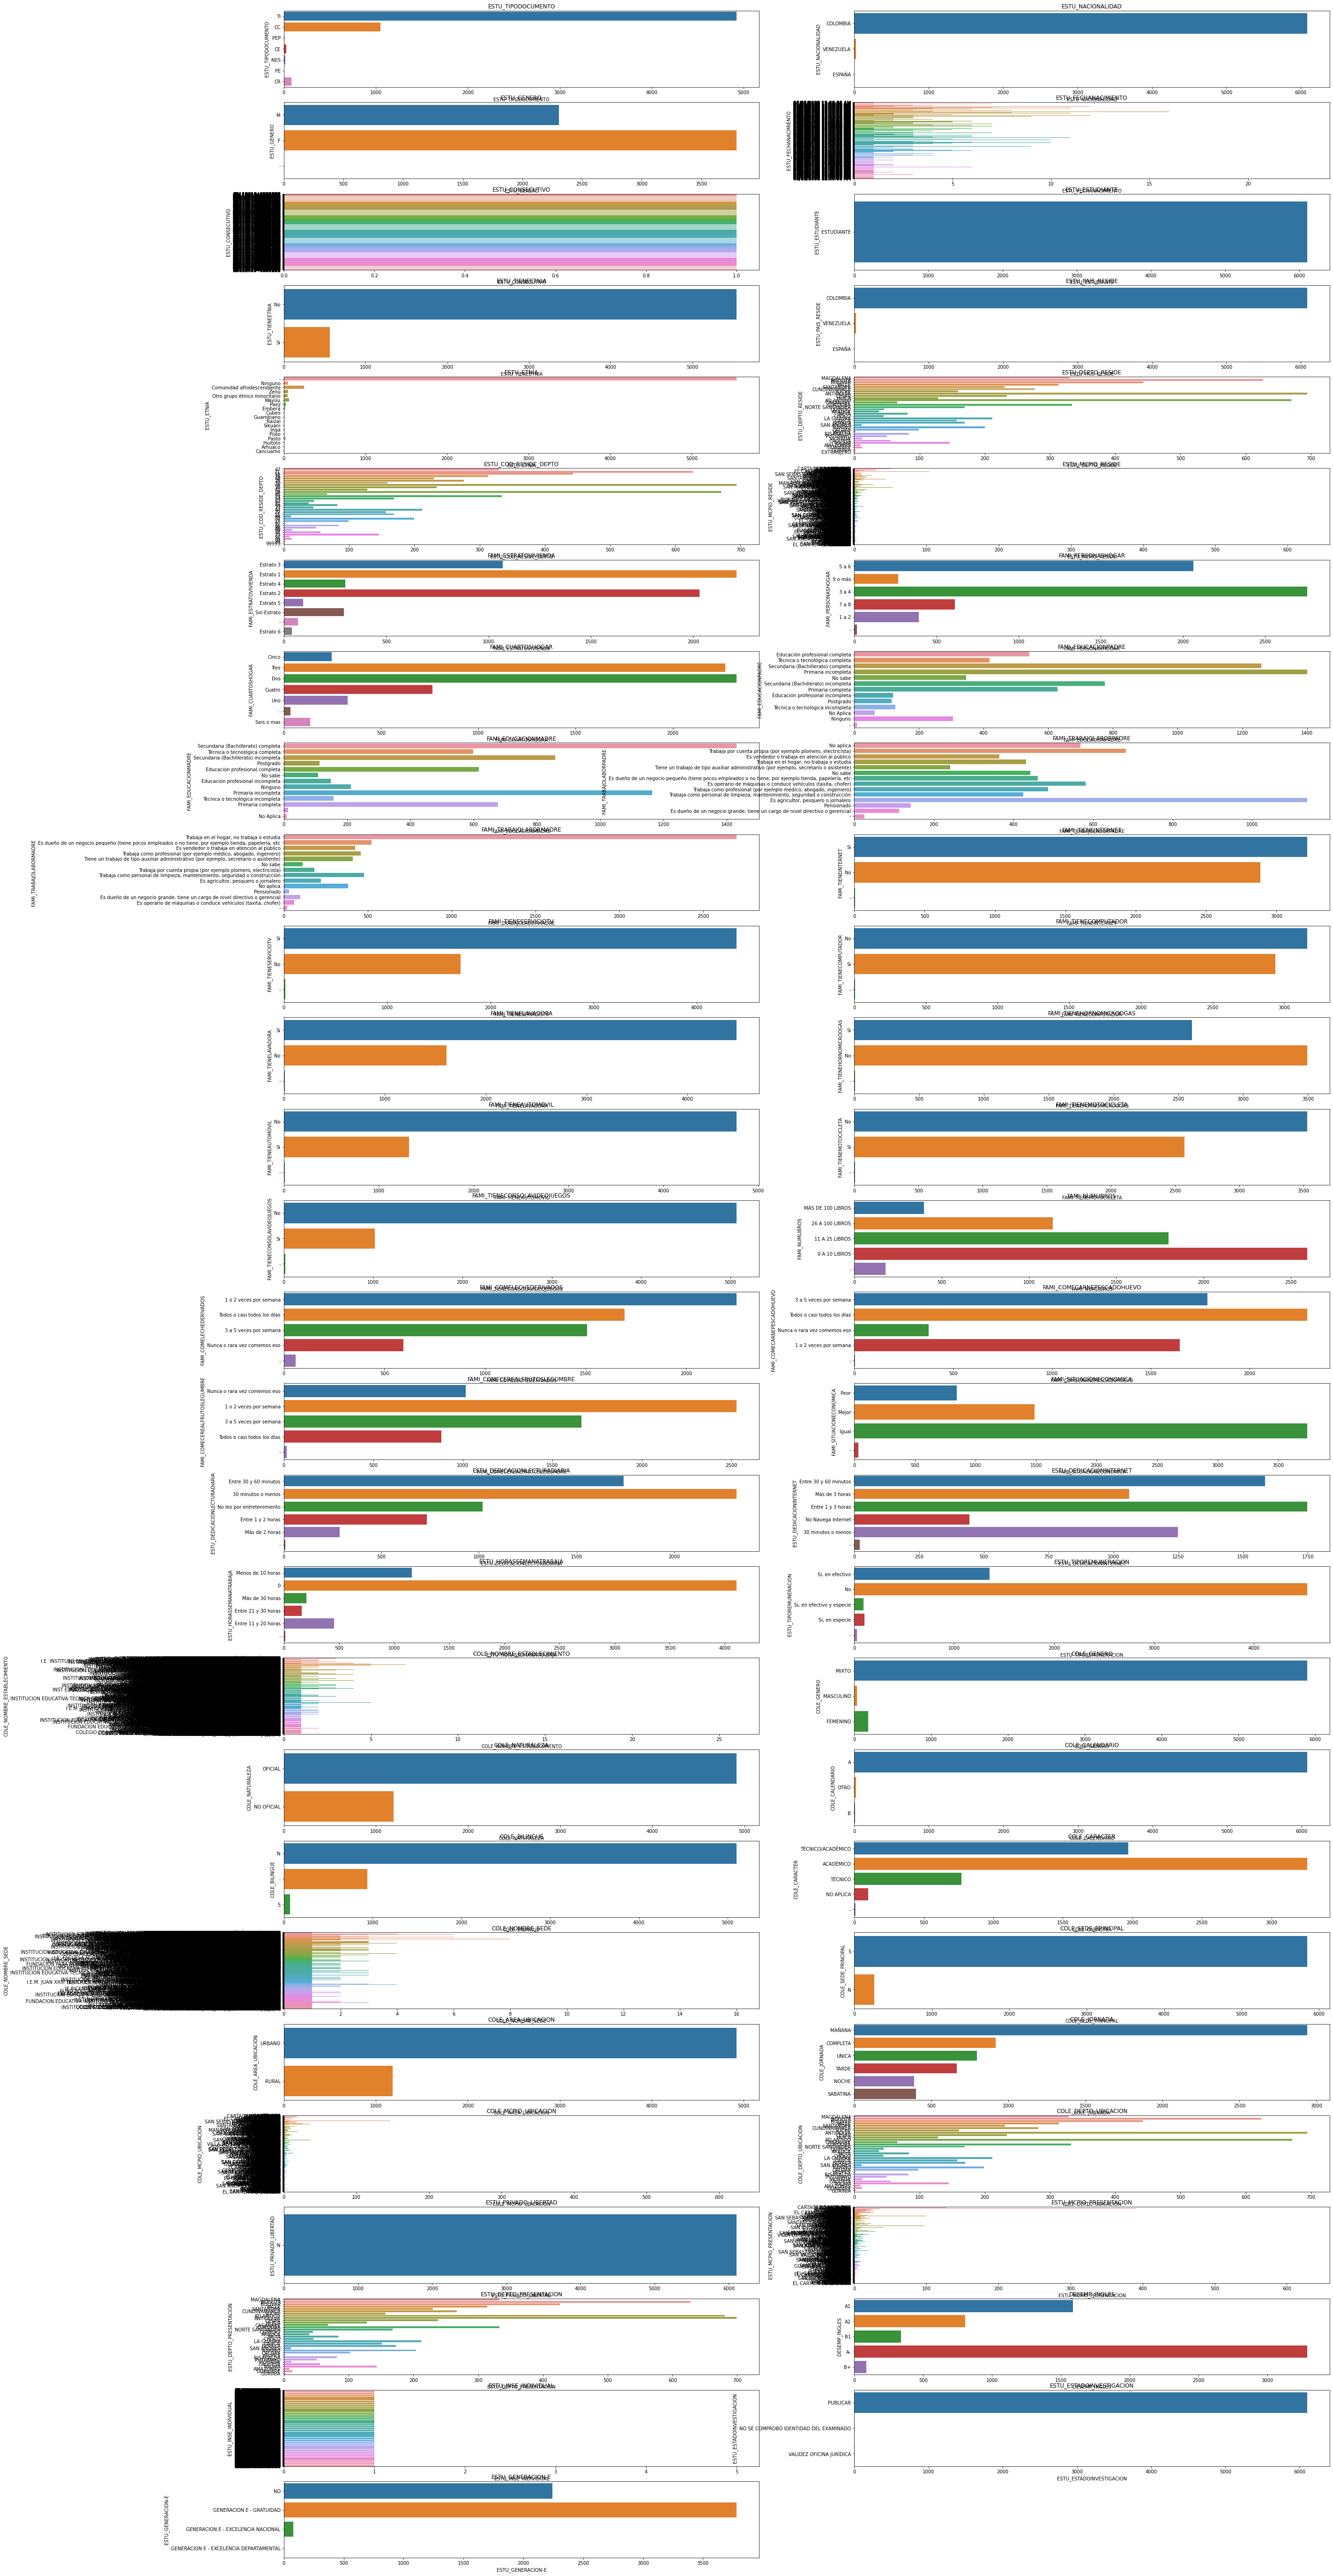

In [44]:
plt.figure(figsize=(40, 100), facecolor='white')
plotnumber = 1
for dato_Categorico in datos_Categoricos:
    ax = plt.subplot(28,2,plotnumber)
    sns.countplot(y=dato_Categorico,data=Saber_11)
    plt.xlabel(dato_Categorico)
    plt.title(dato_Categorico)
    plotnumber+=1
plt.show()

# Thanks!